In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("D:/Datasets/train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
x = df.drop(columns='SalePrice')
y = df['SalePrice']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [5]:
x_train.shape

(1314, 80)

In [6]:
x_test.shape

(146, 80)

# Missing values.

In [7]:
## Let's capture all the nan values.
## Fisrt lets handle Categorical features which are missing.

features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype == "O"]

for feature in features_nan:
    print(f'{feature},{np.round(df[feature].isnull().sum()/df.shape[0]*100,2)} % missing values')

Alley,93.77 % missing values
MasVnrType,0.55 % missing values
BsmtQual,2.53 % missing values
BsmtCond,2.53 % missing values
BsmtExposure,2.6 % missing values
BsmtFinType1,2.53 % missing values
BsmtFinType2,2.6 % missing values
FireplaceQu,47.26 % missing values
GarageType,5.55 % missing values
GarageFinish,5.55 % missing values
GarageQual,5.55 % missing values
GarageCond,5.55 % missing values
PoolQC,99.52 % missing values
Fence,80.75 % missing values
MiscFeature,96.3 % missing values


#### Categotrical Values

In [8]:
## Replace missing value with a new label.
def replace_cat_feature(df,features_nan):
    df_copy = df.copy()
    df_copy[features_nan] = df_copy[features_nan].fillna('Missing')
    return df_copy
df = replace_cat_feature(df,features_nan)

In [9]:
df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

#### Numerical Values

In [10]:
## Now let's check for numerical variables that contains missing values.

numerical_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype != "O"]

for feature in numerical_with_nan:
    print(f'{feature} : {np.round(df[feature].isnull().sum()/df.shape[0]*100,2)} % missing values')

LotFrontage : 17.74 % missing values
MasVnrArea : 0.55 % missing values
GarageYrBlt : 5.55 % missing values


In [11]:
## Replacing the numerical Missing Values.
## Always try to make a new feature where you have alot of nan values.

for feature in numerical_with_nan:
    df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
    df[feature].fillna(df[feature].median(),inplace=True)

df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### Temporal Variables.

In [12]:
## Temporal variables  (Date Time Variables.)
## How many years it has been. since built,remodification, garage built.

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]

In [13]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [14]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].isnull().sum()

YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
dtype: int64

# Numerical Variables.

Since the numerical variables are skewed we will perform log normal distribution.

In [15]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

There are many skewed numricals variables. we saw that on EDA. But skip those which variabla has ***0 in it***

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>]],
      dtype=object)

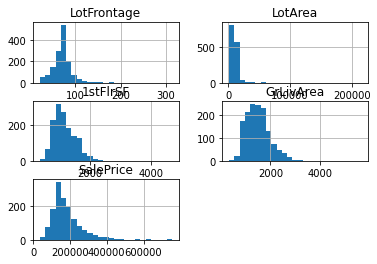

In [16]:
skewed_num_features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']
df[skewed_num_features].hist(bins=25)

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>]],
      dtype=object)

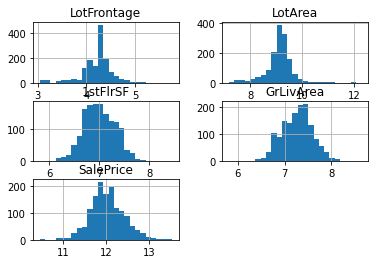

In [17]:
for feature in skewed_num_features:
    df[feature] = np.log(df[feature])
    
df[skewed_num_features].hist(bins=25)

# Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations.

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [19]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [49]:
for feature in categorical_features:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
df.head(100)

Id  MSSubClass  MSZoning  LotFrontage    LotArea    Street    Alley  \
0     1          60        RL     4.174387   9.041922      Pave  Missing   
1     2          20        RL     4.382027   9.169518      Pave  Missing   
2     3          60        RL     4.219508   9.328123      Pave  Missing   
3     4          70        RL     4.094345   9.164296      Pave  Missing   
4     5          60        RL     4.430817   9.565214      Pave  Missing   
5     6          50        RL     4.442651   9.554993      Pave  Missing   
6     7          20        RL     4.317488   9.218705      Pave  Missing   
7     8          60        RL     4.234107   9.247829      Pave  Missing   
8     9          50        RM     3.931826   8.719317      Pave  Missing   
9    10         190        RL     3.912023   8.911934      Pave  Missing   
10   11          20        RL     4.248495   9.323669      Pave  Missing   
11   12          60        RL     4.442651   9.386308      Pave  Missing   
12   13          20        RL     4.234107   9.470240      Pave  Missing   
13   14          20        RL     4.510860   9.273503      Pave  Missing   
14   15          20        RL     4.234107   9.298351      Pave  Missing   
15   16          45        RM     3.931826   8.719317      Pave  Missing   
16   17          20        RL     4.234107   9.327323      Pave  Missing   
17   18          90        RL     4.276666   9.286468      Pave  Missing   
18   19          20        RL     4.189655   9.524786      Pave  Missing   
19   20          20        RL     4.248495   8.930626      Pave  Missing   
20   21          60        RL     4.615121   9.562053      Pave  Missing   
21   22          45        RM     4.043051   8.915835      Pave     Grvl   
22   23          20        RL     4.317488   9.184202      Pave  Missing   
23   24         120        RM     3.784190   8.348538      Pave  Missing   
24   25          20        RL     4.234107   9.017484      Pave  Missing   
25   26          20        RL     4.700480   9.563108      Pave  Missing   
26   27          20        RL     4.094345   8.881836      Pave  Missing   
27   28          20        RL     4.584967   9.348187      Pave  Missing   
28   29          20        RL     3.850148   9.700208      Pave  Missing   
29   30          30        RM     4.094345   8.752107      Pave  Missing   
30   31          70  Rare_var     3.912023   9.047821      Pave     Pave   
31   32          20        RL     4.234107   9.052985      Pave  Missing   
32   33          20        RL     4.442651   9.310095      Pave  Missing   
33   34          20        RL     4.248495   9.264071      Pave  Missing   
34   35         120        RL     4.094345   8.897409      Pave  Missing   
35   36          60        RL     4.682131   9.504352      Pave  Missing   
36   37          20        RL     4.718499   9.292750      Pave  Missing   
37   38          20        RL     4.304065   9.051579      Pave  Missing   
38   39          20        RL     4.219508   8.977399      Pave  Missing   
39   40          90        RL     4.174387   8.706159      Pave  Missing   
40   41          20        RL     4.430817   9.066239      Pave  Missing   
41   42          20        RL     4.744932   9.735365      Pave  Missing   
42   43          85        RL     4.234107   9.124782      Pave  Missing   
43   44          20        RL     4.234107   9.126959      Pave  Missing   
44   45          20        RL     4.248495   8.980298      Pave  Missing   
45   46         120        RL     4.110874   8.943506      Pave  Missing   
46   47          50        RL     3.871201   9.458918      Pave  Missing   
47   48          20        FV     4.430817   9.314340      Pave  Missing   
48   49         190        RM     3.496508   8.402007      Pave  Missing   
49   50          20        RL     4.189655   8.954415      Pave  Missing   
50   51          60        RL     4.234107   9.537411      Pave  Missing   
51   52          50        RM     3.951244   8.738735

In [67]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [68]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0           10           10           2   
1            31          0         0            4            3           1   
2             6          0         0           10           10           2   
3            36          0         0            2            4           1   
4             8          0         0           10           10           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        2          4           1           3   
1        284         1262        2          4           1           3   
2        434          920        2          4           1           3   
3        540          756        2          3           1           3   
4        490         1145        2          4           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

# Feature Scaling

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
## Features that need to be scaled.
feature_scale = [feature for feature in df.columns if feature not in ['Id','SalePrice']]

scaler = MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [103]:
df_scaled = pd.concat([df[['Id','SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)],
                   axis=1)

In [104]:
df_scaled

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0        1  12.247694    0.235294      0.75     0.418208  0.366344     1.0   
1        2  12.109011    0.000000      0.75     0.495064  0.391317     1.0   
2        3  12.317167    0.235294      0.75     0.434909  0.422359     1.0   
3        4  11.849398    0.294118      0.75     0.388581  0.390295     1.0   
4        5  12.429216    0.235294      0.75     0.513123  0.468761     1.0   
5        6  11.870600    0.176471      0.75     0.517503  0.466761     1.0   
6        7  12.634603    0.000000      0.75     0.471175  0.400943     1.0   
7        8  12.206073    0.235294      0.75     0.440313  0.406643     1.0   
8        9  11.774520    0.176471      0.25     0.328426  0.303205     1.0   
9       10  11.678440    1.000000      0.75     0.321097  0.340903     1.0   
10      11  11.771436    0.000000      0.75     0.445638  0.421487     1.0   
11      12  12.751300    0.235294      0.75     0.517503  0.433746     1.0   
12      13  11.877569    0.000000      0.75     0.440313  0.450173     1.0   
13      14  12.540758    0.000000      0.75     0.542750  0.411668     1.0   
14      15  11.964001    0.000000      0.75     0.440313  0.416532     1.0   
15      16  11.790557    0.147059      0.25     0.328426  0.303205     1.0   
16      17  11.911702    0.000000      0.75     0.440313  0.422202     1.0   
17      18  11.407565    0.411765      0.75     0.456066  0.414206     1.0   
18      19  11.976659    0.000000      0.75     0.423859  0.460849     1.0   
19      20  11.842229    0.000000      0.75     0.445638  0.344562     1.0   
20      21  12.692503    0.235294      0.75     0.581341  0.468143     1.0   
21      22  11.845103    0.147059      0.25     0.369595  0.341667     1.0   
22      23  12.345835    0.000000      0.75     0.471175  0.394191     1.0   
23      24  11.774520    0.588235      0.25     0.273780  0.230637     1.0   
24      25  11.944708    0.000000      0.75     0.440313  0.361561     1.0   
25      26  12.454104    0.000000      0.75     0.612936  0.468349     1.0   
26      27  11.811547    0.000000      0.75     0.388581  0.335012     1.0   
27      28  12.631340    0.000000      0.75     0.570180  0.426285     1.0   
28      29  12.242887    0.000000      0.75     0.298194  0.495182     1.0   
29      30  11.134589    0.058824      0.25     0.388581  0.309622     1.0   
30      31  10.596635    0.294118      0.00     0.321097  0.367499     1.0   
31      32  11.914048    0.000000      0.75     0.440313  0.368509     1.0   
32      33  12.100156    0.000000      0.75     0.517503  0.418830     1.0   
33      34  12.016726    0.000000      0.75     0.445638  0.409822     1.0   
34      35  12.533576    0.588235      0.75     0.388581  0.338060     1.0   
35      36  12.641097    0.235294      0.75     0.606144  0.456850     1.0   
36      37  11.884489    0.000000      0.75     0.619606  0.415435     1.0   
37      38  11.938193    0.000000      0.75     0.466207  0.368234     1.0   
38      39  11.599103    0.000000      0.75     0.434909  0.353716     1.0   
39      40  11.314475    0.411765      0.75     0.418208  0.300629     1.0   
40      41  11.982929    0.000000      0.75     0.513123  0.371103     1.0   
41      42  12.043554    0.000000      0.75     0.629390  0.502063     1.0   
42      43  11.877569    0.382353      0.75     0.440313  0.382561     1.0   
43      44  11.777211    0.000000      0.75     0.440313  0.382987     1.0   
44      45  11.856515    0.000000      0.75     0.445638  0.354283     1.0   
45      46  12.675764    0.588235      0.75     0.394699  0.347082     1.0   
46      47  12.387085    0.176471      0.75     0.305987  0.447957     1.0   
47      48  12.428015    0.000000      1.00     0.513123  0.419661     1.0   
48      49  11.635143    1.000000      0.25     0.167298  0.241102     1.0   
49      50  11.751942    0.000000      0.75     0.423859  0.349217     1.0   
50      51  12.083905    0.235